In [6]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

<b><h5>Enunciado de Problema</h5></b>
<h6>Las Granjas Osorno se especializan en la producción de un alimento especial para el ganado, que es una mezcla de maíz y soja. La composición nutricional de estos ingredientes y sus costos son los siguientes:
<br>
<ul>
    <li> El maíz contiene 0,09 g de proteínas y 0,02 g de fibra por gramo, con un costo de $0,30 por gramo.
    <li> La Soja contiene 0,60 g de proteínas y 0,06 g de fibra por gramo, con un costo de $0,90 por gramo.
</ul>

Las necesidades dietéticas del alimento especial requieren un mínimo del 30% de proteínas y un máximo del 5% de fibra. Granjas Osorno desea determinar las proporciones óptimas de maíz y soja para producir un alimento con costos mínimos, manteniendo las restricciones nutricionales y asegurando que se utilice un mínimo de 800 gramos de alimento diariamente.
</h6>

<b><h5>Restricciones</h5></b>

<h6>
<ol>
    <li>La cantidad total de alimento debe ser al menos 800 gramos al día.</li>
    <li>El alimento debe contener al menos un 30% de proteínas y no más del 5% de fibra.</li>
</ol>
</h6>

<b><h5>Objetivo</h5></b>
<h6>Minimizar el costo total diario de la mezcla de alimentos.</h6>

<b><h5>Preguntas</h5></b>
<h6>
<ol>
    <li>¿Cuántos gramos de maíz y soja se deben utilizar para minimizar el costo diario?</li>
    <li>¿Cuál es el costo mínimo diario de la mezcla de alimentos?</li>
</ol>
</h6>

<b><h5>Instrucciones</h5></b>
<h6>Utilizar métodos de programación lineal para solucionar este problema. Representar las restricciones y la función objetivo matemáticamente en código. Utilizar Python y las bibliotecas <b>SciPy</b> y <b>Matplotlib</b> para resolver el problema y visualizar la solución óptima en un gráfico. Indicar claramente la solución óptima y cualquier suposición realizada durante la resolución del problema.
</h6>


In [7]:
# Coeficientes de la función objetivo
c = np.array([0.3, 0.9])

# Coeficientes de las restricciones (Lado izquierdo)
A_eq = np.array([[1, 1], [0.21, -0.3]])

# Lado derecho de las restricciones
b_eq = np.array([800, 0])

In [8]:
# Restricciones de desigualdad (límites inferiores)
x0_bounds = (0, None)
x1_bounds = (0, None)

# Resolver el problema de minimización
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=[x0_bounds, x1_bounds], method='highs')

In [9]:
# Mostrar resultados
print("Status:", result.message)
print("Gramos de maíz =", result.x[0], "g")
print("Gramos de soya =", result.x[1], "g")
print("Costo mínimo diario =", result.fun, "$")

Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Gramos de maíz = 470.5882352941176 g
Gramos de soya = 329.4117647058824 g
Costo mínimo diario = 437.6470588235294 $


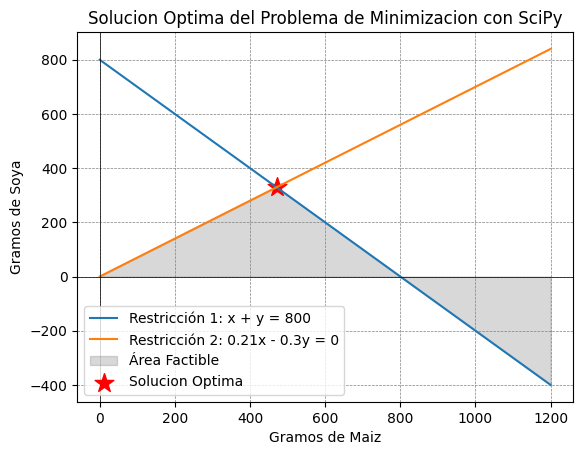

In [10]:
# Graficar la solución óptima
x = np.linspace(0, 1200, 100)
y1 = 800 - x
y2 = (0.21 * x) / 0.3

plt.plot(x, y1, label="Restricción 1: x + y = 800")
plt.plot(x, y2, label="Restricción 2: 0.21x - 0.3y = 0")
plt.fill_between(x, np.minimum(y1, y2), alpha=0.3, color='gray', label="Área Factible")
plt.scatter(result.x[0], result.x[1], color='red', marker='*', s=200, label="Solucion Optima")
plt.xlabel("Gramos de Maiz")
plt.ylabel("Gramos de Soya")
plt.title("Solucion Optima del Problema de Minimizacion con SciPy")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()